数据查看


数据展示


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.render import make_snapshot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, silhouette_score
from sklearn.inspection import permutation_importance
# from xgboost import XGBClassifier
import warnings

# 指定字体路径
# my_font = font_manager.FontProperties(fname=r'/home/mw/project/微软雅黑.ttf')

# 设置报错提示级别
warnings.filterwarnings(action='ignore')

data = pd.read_csv(r'D:\Py_Project\Langcahin\机器学习\Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
print(f"数据集行数：{data.shape[0]}")
print(f"数据集列数：{data.shape[1]}")

数据集行数：2392
数据集列数：15


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


缺失值检测


In [6]:

print(data.isnull().sum())

print(data.duplicated().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
0


In [6]:
# 导入 Pandas 库（如果尚未导入）
import pandas as pd

# 确保加载数据：将 your_data_file.csv 替换为您的实际文件名
data = pd.read_csv(r'D:\Py_Project\Langcahin\机器学习\Student_performance_data _.csv')

data['StudentID'] = data['StudentID'].astype(dtype='object')
print(data['StudentID'].dtype)

data['GradeClass'] = data['GradeClass'].astype(dtype='int')
print(data['GradeClass'].dtype)

object
int64


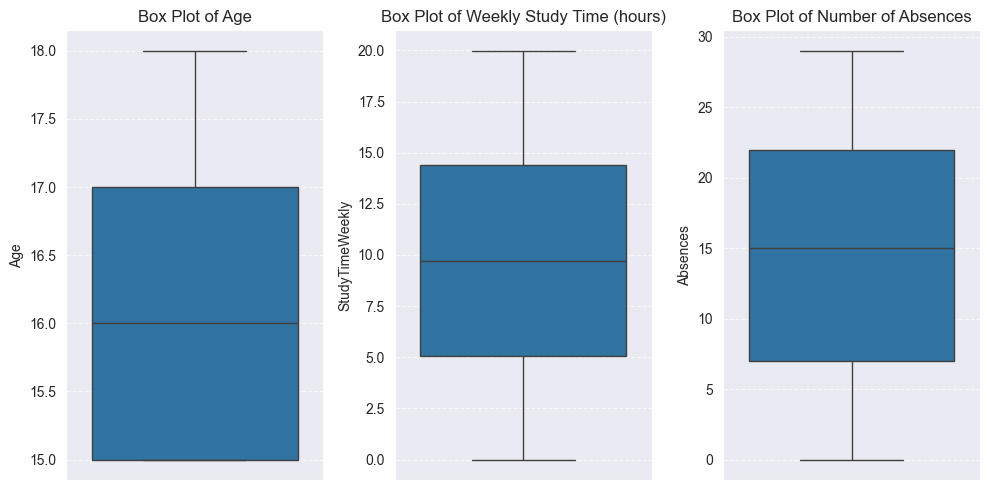

In [12]:
import seaborn as sns
# Feature Dictionary
feature = {
    'Age':'Age',
    'StudyTimeWeekly':'Weekly Study Time (hours)',
    'Absences':'Number of Absences'
}

plt.figure(figsize=(10, 5))
for i, (col, col_name) in enumerate(feature.items(), start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data[col])
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    plt.title(f"Box Plot of {col_name}")

plt.tight_layout()
plt.show()

异常值检测


In [13]:

labels=['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
for col in labels:
    print(f"{col}列值个数：{data[col].nunique()}")
    print(data[col].unique())
    print('-'*45)

Gender列值个数：2
[1 0]
---------------------------------------------
Ethnicity列值个数：4
[0 2 1 3]
---------------------------------------------
ParentalEducation列值个数：5
[2 1 3 4 0]
---------------------------------------------
Tutoring列值个数：2
[1 0]
---------------------------------------------
ParentalSupport列值个数：5
[2 1 3 4 0]
---------------------------------------------
Extracurricular列值个数：2
[0 1]
---------------------------------------------
Sports列值个数：2
[0 1]
---------------------------------------------
Music列值个数：2
[1 0]
---------------------------------------------
Volunteering列值个数：2
[0 1]
---------------------------------------------
GradeClass列值个数：5
[2 1 4 3 0]
---------------------------------------------


特征描述


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


特征值


In [6]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 年龄分布
x_data = data['Age'].value_counts().index.tolist()
y_data = data['Age'].value_counts().values.tolist()

bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('年龄分布', y_data)
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='年龄分布图'),
    xaxis_opts=opts.AxisOpts(name='年龄'),
    yaxis_opts=opts.AxisOpts(name='数量')
)

bar.render_notebook()

In [7]:
##学习时常
# 每周学习时长分布
bins = [0, 5, 10, 15, 20]
labels = ['0-5', '6-10', '11-15', '16-20']
StudyTimeWeekly_cut = pd.cut(x=data['StudyTimeWeekly'], bins=bins, labels=labels)
counts = StudyTimeWeekly_cut.value_counts().sort_index()
x_data = counts.index.tolist()
y_data = counts.values.tolist()

bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('每周学习时长分布', y_data)
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='每周学习时长分布图'),
    xaxis_opts=opts.AxisOpts(name='时长'),
    yaxis_opts=opts.AxisOpts(name='数量')
)

bar.render_notebook()

In [10]:
from pyecharts.charts import Pie
# 最好也导入配置选项
from pyecharts import options as opts
# 性别分布
labels = ['女性', '男性']
counts = data['Gender'].value_counts().values.tolist()

pie = Pie()
pie.add('性别分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='性别分布图')
)

pie.render_notebook()

In [8]:

# 缺勤次数分布
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29']
Absences_cut = pd.cut(x=data['Absences'], bins=bins, labels=labels, right=False, include_lowest=True)
counts = Absences_cut.value_counts().sort_index()
x_data = counts.index.tolist()
y_data = counts.values.tolist()

bar = Bar()
bar.add_xaxis(x_data)
bar.add_yaxis('缺勤次数分布', y_data)
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='缺勤次数分布图'),
    xaxis_opts=opts.AxisOpts(name='缺勤次数'),
    yaxis_opts=opts.AxisOpts(name='数量')
)

bar.render_notebook()

In [12]:

# 父母教育程度分布
labels = ['无', '高中', '一些学院', '学士学位', '更高']
counts = data['ParentalEducation'].value_counts().sort_index().values.tolist()

pie = Pie()
pie.add('父母教育程度分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='父母教育程度分布图')
)

pie.render_notebook()

In [9]:
# 种族分布
labels = ['高加索人', '非裔美国人', '亚洲', '其他']
counts = data['Ethnicity'].value_counts().values.tolist()

pie = Pie()
pie.add('种族分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='种族分布图')
)

pie.render_notebook()

In [10]:

# 辅导状态分布
labels = ['否', '是']
counts = data['Tutoring'].value_counts().values.tolist()

pie = Pie()
pie.add('辅导状态分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='辅导状态分布图')
)

pie.render_notebook()

In [15]:

# 课外活动分布
labels = ['否', '是']
counts = data['Extracurricular'].value_counts().values.tolist()

pie = Pie()
pie.add('课外活动分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='课外活动分布图')
)

pie.render_notebook()

In [11]:

# 父母支持级别分布
labels = ['无', '低', '中等', '高', '非常高']
counts = data['ParentalSupport'].value_counts().sort_index().values.tolist()

pie = Pie()
pie.add('父母支持级别分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='父母支持级别分布图')
)

pie.render_notebook()

In [17]:

# 音乐活动分布
labels = ['否', '是']
counts = data['Music'].value_counts().values.tolist()

pie = Pie()
pie.add('音乐活动分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='音乐活动分布图')
)

pie.render_notebook()

In [12]:

# 体育活动分布
labels = ['否', '是']
counts = data['Sports'].value_counts().values.tolist()

pie = Pie()
pie.add('体育活动分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='体育活动分布图')
)

pie.render_notebook()

In [19]:

# 成绩等级分布
labels = ['A', 'B', 'C', 'D', 'F']
counts = data['GradeClass'].value_counts().sort_index().values.tolist()

pie = Pie()
pie.add('成绩等级分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='成绩等级分布图')
)

pie.render_notebook()

In [13]:

# 志愿服务分布
labels = ['否', '是']
counts = data['Volunteering'].value_counts().values.tolist()

pie = Pie()
pie.add('志愿服务分布', data_pair=[list(x) for x in zip(labels, counts)], label_opts=opts.LabelOpts(formatter="{b}: {d}%", position='inside'))
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='志愿服务分布图')
)

pie.render_notebook()

特征缩放


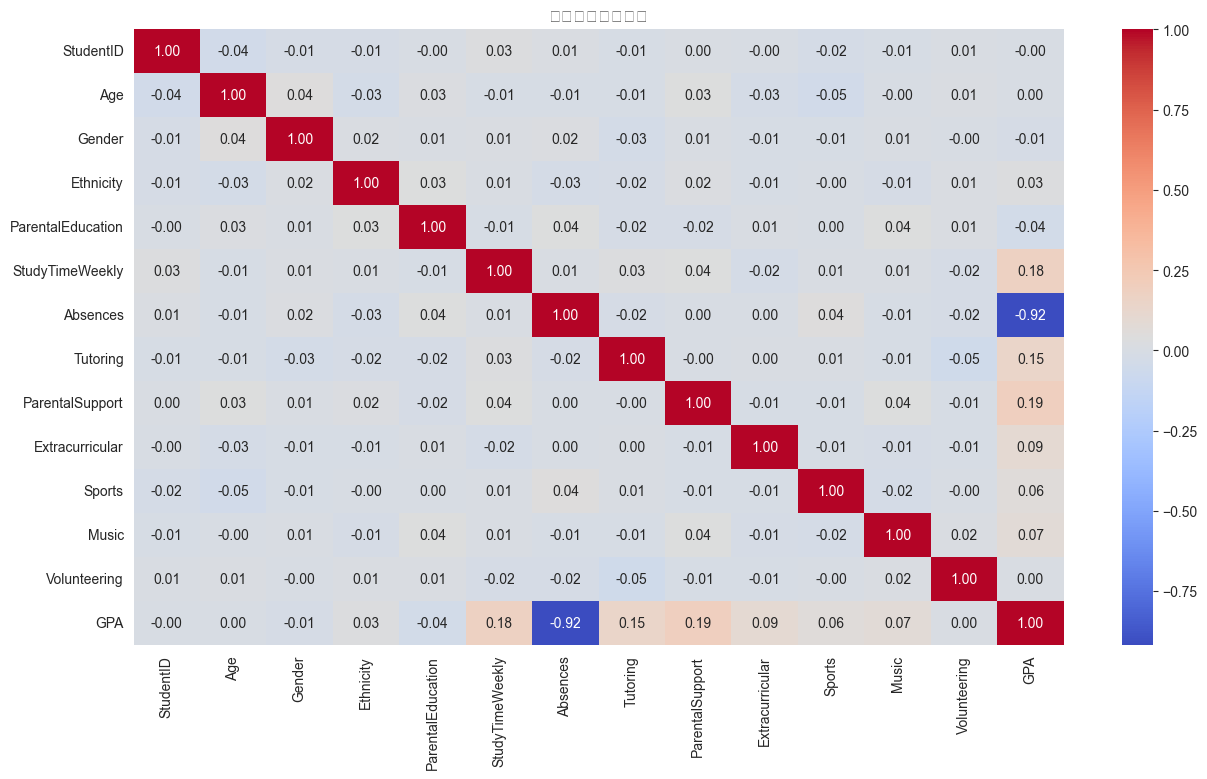

In [14]:
import pandas as pd
import numpy as np # 虽然当前代码没有用到，但数据分析中常用
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data.drop(labels='GradeClass', axis=1).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(data=correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('特征相关性热力图')
plt.show()


In [16]:

X = data.drop(labels=['StudentID', 'GPA', 'GradeClass'], axis=1)
y = data['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from xgboost import XGBClassifier


# 分类模型字典
classification_models = {
    "逻辑回归": LogisticRegression(),
    "K近邻": KNeighborsClassifier(),
    "支持向量机": SVC(),
    "决策树": DecisionTreeClassifier(),
    "随机森林": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

models = list()
accuracies = list()

# 选择模型
for name, clf in classification_models.items():
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    models.append(name)
    accuracies.append(score)

df = pd.DataFrame(data={'分类模型':models, '准确率':accuracies})
df.sort_values(by='准确率', ascending=False)

,分类模型,准确率
4,随机森林,0.692201
0,逻辑回归,0.690808
5,XGBoost,0.679666
2,支持向量机,0.676880
3,决策树,0.594708
1,K近邻,0.559889


In [18]:

X = data.drop(labels=['StudentID', 'GPA', 'GradeClass'], axis=1)
y = data['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from xgboost import XGBClassifier
clf = XGBClassifier(objective='multi:softmax')
clf.fit(X_train_scaled, y_train)

# 在测试集上预测
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)

# 评估模型
print(f"模型准确率：{accuracy_score(y_test, y_pred)}")

模型准确率：0.6796657381615598


In [20]:

# 定义模型
model = XGBClassifier()

# 定义参数网格
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7]
}

# 定义网格搜索
search = GridSearchCV(model, param_grid=grid, scoring='accuracy', cv=5, verbose=1)
search.fit(X_train_scaled, y_train)

print(f"最优参数：{search.best_params_}")
print(f"最优模型交叉验证得分：{search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
最优参数：{'max_depth': 9, 'min_child_weight': 3}
最优模型交叉验证得分：0.7126767360800785


In [21]:

grid = {
    'max_depth': [3],
    'min_child_weight': [3],
    'gamma': [0, 0.1, 0.2, 0.5]
}

search = GridSearchCV(model, param_grid=grid, scoring='accuracy', cv=5, verbose=1)
search.fit(X_train_scaled, y_train)

print(f"最优参数：{search.best_params_}")
print(f"最优模型交叉验证得分：{search.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
最优参数：{'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 3}
最优模型交叉验证得分：0.7102761640897309


In [22]:

grid = {
    'max_depth': [3],
    'min_child_weight': [3],
    'gamma': [0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

search = GridSearchCV(model, param_grid=grid, scoring='accuracy', cv=5, verbose=1)
search.fit(X_train_scaled, y_train)

print(f"最优参数：{search.best_params_}")
print(f"最优模型交叉验证得分：{search.best_score_}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
最优参数：{'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.6}
最优模型交叉验证得分：0.7228206274019126


In [23]:

grid = {
    'max_depth': [3],
    'min_child_weight': [3],
    'gamma': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1.0, 10]
}

search = GridSearchCV(model, param_grid=grid, scoring='accuracy', cv=5, verbose=1)
search.fit(X_train_scaled, y_train)

print(f"最优参数：{search.best_params_}")
print(f"最优模型交叉验证得分：{search.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
最优参数：{'colsample_bytree': 0.7, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.7}
最优模型交叉验证得分：0.7246080972383591


In [24]:

grid = {
    'max_depth': [3],
    'min_child_weight': [3],
    'gamma': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'reg_alpha': [1],
    'reg_lambda': [1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

search = GridSearchCV(model, param_grid=grid, scoring='accuracy', cv=5, verbose=1)
search.fit(X_train_scaled, y_train)

print(f"最优参数：{search.best_params_}")
print(f"最优模型交叉验证得分：{search.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
最优参数：{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 1.0, 'subsample': 0.7}
最优模型交叉验证得分：0.7234158548574492


In [25]:

best_model = search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# 在测试集上预测
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)

# 评估模型
print(f"模型准确率：{accuracy_score(y_test, y_pred)}")
print(f"分类报告：\n{classification_report(y_test, y_pred)}")
print(f"AUC分数：{roc_auc_score(y_test, y_prob, multi_class='ovo')}")

模型准确率：0.7075208913649025
分类报告：
              precision    recall  f1-score   support

           0       0.71      0.15      0.25        33
           1       0.55      0.55      0.55        80
           2       0.50      0.56      0.53       121
           3       0.51      0.43      0.46       127
           4       0.86      0.94      0.90       357

    accuracy                           0.71       718
   macro avg       0.63      0.53      0.54       718
weighted avg       0.70      0.71      0.69       718

AUC分数：0.8271642934452326


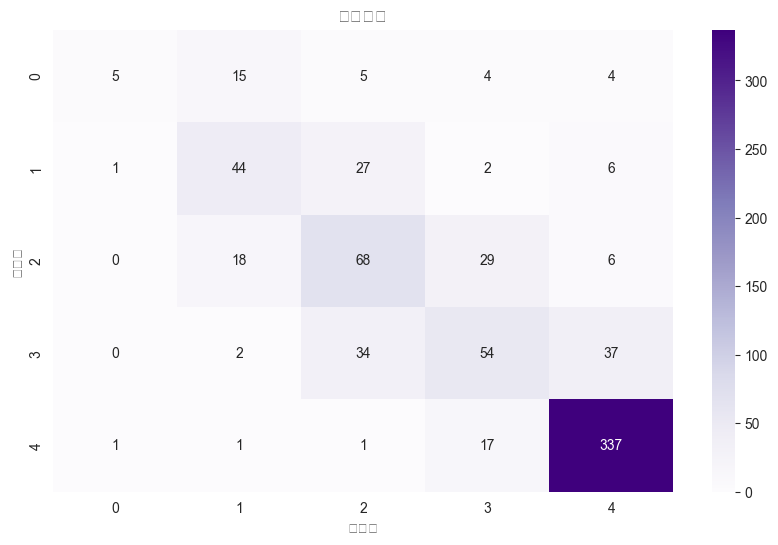

In [28]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(data=cm, cmap='Purples', annot=True, fmt='d')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('混淆矩阵')

plt.show()

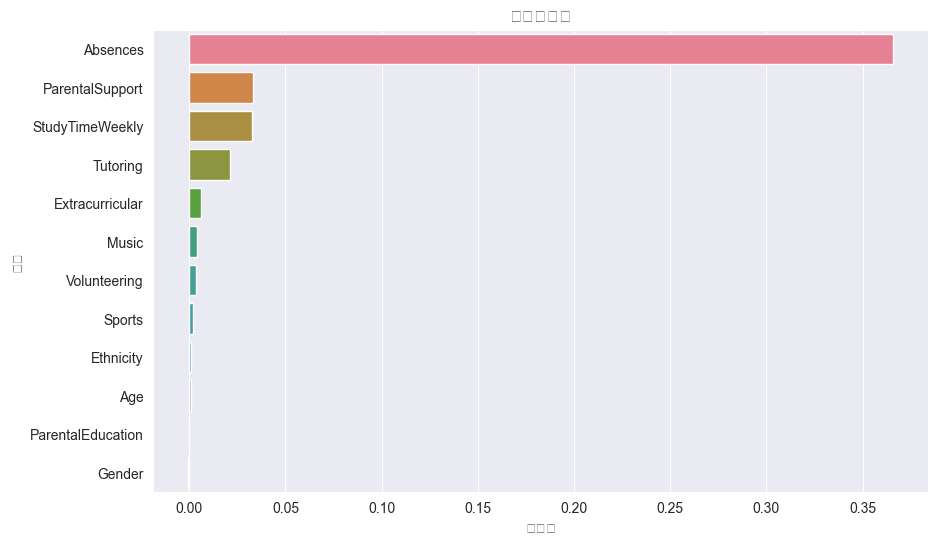

In [30]:

result = permutation_importance(estimator=best_model, X=X_test_scaled, y=y_test, n_repeats=10, random_state=42)
feature_importances = pd.DataFrame(data={'特征':X.columns, '重要性':result['importances_mean']}).sort_values(by='重要性', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='重要性', y='特征', orient='h', hue='特征')
plt.xlabel('重要性')
plt.ylabel('特征')
plt.title('特征重要性')
plt.show()

In [31]:

# 选择与学生自己成绩有关的特征
X = data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'GPA']]

In [32]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:

# 计算不同K值的惯性（簇内平方和）和轮廓系数
inertias = list()
silhouette_scores = list()
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 格式化数据
inertias = [round(x) for x in inertias]
silhouette_scores = [round(x, 4) for x in silhouette_scores]

# 绘制肘部曲线
line = (
    Line()
    .add_xaxis(k_range)
    .add_yaxis('惯性(簇内平方和)', inertias, is_smooth=True)
    .extend_axis(yaxis=opts.AxisOpts(position='right'))
    .add_yaxis('轮廓系数', silhouette_scores, is_smooth=True, yaxis_index=1)
    .set_global_opts(
        title_opts=opts.TitleOpts(title='可视化最佳K值选择图'),
        xaxis_opts=opts.AxisOpts(name='聚类中心数', name_location='center'),
        yaxis_opts=opts.AxisOpts(name='惯性'),
        tooltip_opts=opts.TooltipOpts(trigger='axis')
    )
)

line.render_notebook()

In [34]:

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

# 获取聚类结果
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# 将聚类结果添加到原始数据中
data['Cluster'] = cluster_labels

In [35]:

# 特征降维（PCA降维）
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
cluster_centroids_pca = pca.transform(cluster_centroids)

print(f"每个主成分的方差解释率：{[float(round(i, 2)) for i in pca.explained_variance_ratio_]}")
print(f"累计解释率（信息保留总量）：{round(sum(pca.explained_variance_ratio_), 2)}")

每个主成分的方差解释率：[0.49, 0.26, 0.24]
累计解释率（信息保留总量）：0.99


In [36]:

# 构造3D散点图的数据格式
data_3d = [list(X_pca[i])+[int(cluster_labels[i])] for i in range(len(X_scaled))]

# 绘图3D散点图
colors = ['#e6194b', '#4363d8', '#3cb44b', '#f58231', '#911eb4', '#46f0f0']   # 定义颜色

scatter3d = (
    Scatter3D()
    .add(
        series_name="聚类结果",
        data=data_3d,
        xaxis3d_opts=opts.Axis3DOpts(name="主成分1"),
        yaxis3d_opts=opts.Axis3DOpts(name="主成分2"),
        zaxis3d_opts=opts.Axis3DOpts(name="主成分3"),
        grid3d_opts=opts.Grid3DOpts(width=100, depth=100, height=100),
        itemstyle_opts=opts.ItemStyleOpts(opacity=0.8)
    )
    .add(
        series_name='聚类中心点',
        data=cluster_centroids_pca.tolist(),
        itemstyle_opts=opts.ItemStyleOpts(color='black', opacity=1)
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="K-means聚类（PCA降维3D可视化）"),
        visualmap_opts=opts.VisualMapOpts(
            dimension=3,
            max_=int(max(cluster_labels)),
            min_=int(min(cluster_labels)),
            range_color=colors,
            series_index=0
        )
    )
)

scatter3d.render_notebook()

In [37]:

new_data = data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'GPA', 'Cluster']]
cluster_means = new_data.groupby(by='Cluster').agg(func='mean')
cluster_means

,StudyTimeWeekly,Absences,Tutoring,GPA
Cluster,,,,
0,5.067179,8.493450,0.0,2.307413
1,14.487111,21.230952,0.0,1.288263
2,14.589013,6.515152,0.0,2.816947
3,9.650450,21.189840,1.0,1.378223
4,4.954483,22.811083,0.0,0.821458
5,10.420181,6.959654,1.0,2.895235


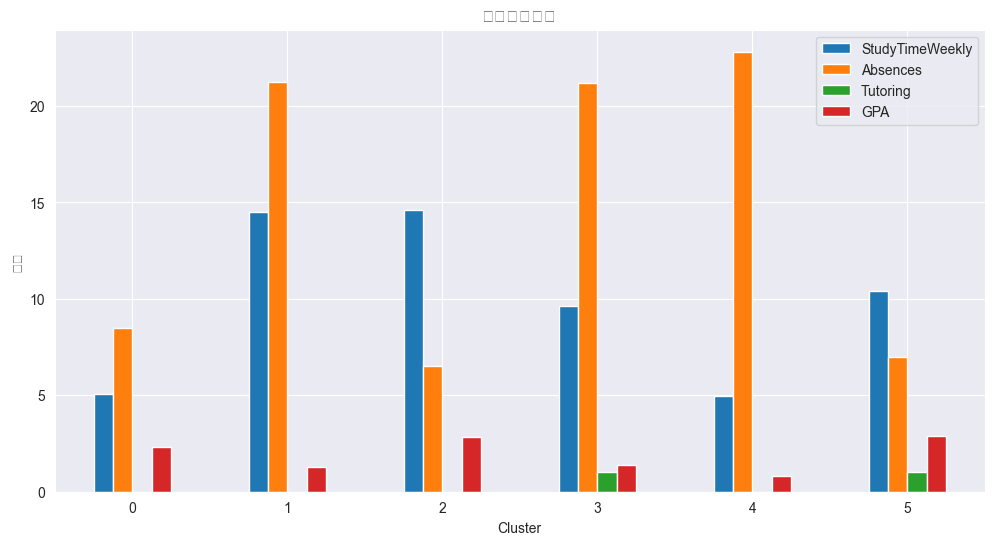

In [39]:

# 可视化簇特征
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('聚类特征均值')
plt.ylabel('均值')
plt.xticks(rotation=0)
plt.show()